# Moment normal force interaction

In this section calculations in which a normal force and moment are interacting with each other will be shown. The different points on the graph are calculated to give insight in the resistance of the columns. Initially, a setup with a bilinear $\sigma$-$\varepsilon$ will be shown, which is relevant for the course Concrete & Steel Structures, this will include calculations. Secondly, a parabolic $\sigma$-$\varepsilon$ will be shown and a normal force-moment interaction diagram will be given. Calculations will not be made on these interaction diagrams, as it is just for illustration purposes.

```{figure} Images/GTB_table2008_bilinear.png
---
---
```

In [328]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Example using linear-rectangle stress strain relations for concrete

The following code shows an example that was part of an assignment for the BSc course Concrete & Steel Structures in the year 2023-2024, which has been slightly modified.

It assumes a linear $\sigma$-$\varepsilon$ diagram.
```{figure} Images/bi_linear_sigma_eps.png

Bi-linear $\sigma$-$\varepsilon$ diagram
```

The corner points of the Moment-Normal force have been calculated. Visually those are shown in. Also the situation for an tensile force and only a moment is added.
```{figure} Images/4_grenssituaties.png

6 grenssituaties
```

### Grenssituatie 0: zuivere buiging, geen normaalkracht

In [329]:
def grenssituatie_0(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta):
    """
    Calculate the design moment capacity (M_Rd0) and design axial force capacity (N_Rd0) 
    for a given concrete section with reinforcement.
    
    Parameters:
    c (float): Cover to reinforcement (mm)
    phi_bgl (float): Diameter of the main longitudinal reinforcement (mm)
    phi_hw (float): Diameter of the stirrups (shear reinforcement) (mm)
    n_hw (int): Number of stirrups in the considered section
    f_yd (float): Design yield strength of the reinforcement (N/mm^2)
    alfa (float): Partial safety factor or strength reduction factor for concrete
    b (float): Width of the concrete section (mm)
    f_cd (float): Design compressive strength of concrete (N/mm^2)
    h (float): Overall depth of the concrete section (mm)
    beta (float): Factor accounting for the distribution of strains or stresses
    
    Returns:
    tuple: M_Rd0 (float), N_Rd0 (float)
    """
    
    # Calculate intermediate values
    a = c + phi_bgl + phi_hw / 2
    A_s = 1 / 4 * np.pi * phi_hw ** 2 * n_hw
    x_u0 = A_s * f_yd / (alfa * b * f_cd)
    N_s_tension = A_s*f_yd
    N_c = a*b * f_cd
    N_s_compression = N_s_tension - N_c
    
    # Calculate outputs
    M_Rd0 = (N_s_tension * (h/2 - a) + N_c * (h/2 - a/2) + N_s_compression * (h/2 - a)) / 1e6
    N_Rd0 = 0
    
    return M_Rd0, N_Rd0

### Grenssituatie 1: gedrukte wapening vloeit op druk, maximale betonstuik bereikt

In [330]:
def grenssituatie_1(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s):
    """
    Calculate the design moment capacity (M_Rd1) and design axial force capacity (N_Rd1) 
    for a given concrete section with reinforcement considering specific strain conditions.
    
    Parameters:
    c (float): Cover to reinforcement (mm)
    phi_bgl (float): Diameter of the main longitudinal reinforcement (mm)
    phi_hw (float): Diameter of the stirrups (shear reinforcement) (mm)
    n_hw (int): Number of stirrups in the considered section
    f_yd (float): Design yield strength of the reinforcement (N/mm^2)
    alfa (float): Partial safety factor or strength reduction factor for concrete
    b (float): Width of the concrete section (mm)
    f_cd (float): Design compressive strength of concrete (N/mm^2)
    h (float): Overall depth of the concrete section (mm)
    beta (float): Factor accounting for the distribution of strains or stresses
    eps_s (float): Strain in the reinforcement
    eps_cu3 (float): Ultimate strain in the concrete
    E_s (float): Modulus of elasticity of the reinforcement (N/mm^2)
    
    Returns:
    tuple: M_Rd1 (float), N_Rd1 (float)
    """
    
    # Calculate intermediate values
    a = c + phi_bgl + phi_hw / 2
    A_s = 1 / 4 * np.pi * phi_hw ** 2 * n_hw
    x_u1 = a / (1 - eps_s / eps_cu3)
    e_sc = e_st = h / 2 - a
    eps_st1 = eps_s
    eps_sc1 = eps_s

    N_st1 = N_sc1 = E_s * eps_st1 * A_s
    N_c1 = alfa * b * f_cd * x_u1
    eps_c1 = h / 2 - beta * x_u1
    
    # Calculate outputs
    M_Rd1 = (N_st1 * e_st + N_sc1 * e_sc + N_c1 * eps_c1) / 1e6  # kNm
    N_Rd1 = (- N_st1 + N_sc1 + N_c1) / 1e3  # kN
    
    return M_Rd1, N_Rd1

### Grenssituatie 2: Getrokken wapening vloeit op trek, maximale betonstuik bereikt

In [331]:
def grenssituatie_2(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s):
    """
    Calculate the design moment capacity (M_Rd2) and design axial force capacity (N_Rd2) 
    for a given concrete section with reinforcement considering specific strain conditions.
    
    Parameters:
    c (float): Cover to reinforcement (mm)
    phi_bgl (float): Diameter of the main longitudinal reinforcement (mm)
    phi_hw (float): Diameter of the stirrups (shear reinforcement) (mm)
    n_hw (int): Number of stirrups in the considered section
    f_yd (float): Design yield strength of the reinforcement (N/mm^2)
    alfa (float): Partial safety factor or strength reduction factor for concrete
    b (float): Width of the concrete section (mm)
    f_cd (float): Design compressive strength of concrete (N/mm^2)
    h (float): Overall depth of the concrete section (mm)
    beta (float): Factor accounting for the distribution of strains or stresses
    eps_s (float): Strain in the reinforcement
    eps_cu3 (float): Ultimate strain in the concrete
    E_s (float): Modulus of elasticity of the reinforcement (N/mm^2)
    
    Returns:
    tuple: M_Rd2 (float), N_Rd2 (float)
    """
    
    # Calculate intermediate values
    a = c + phi_bgl + phi_hw / 2
    A_s = 1 / 4 * np.pi * phi_hw ** 2 * n_hw
    x_u2 = eps_cu3 * (h - a) / (eps_s + eps_cu3)
    e_c2 = h / 2 - beta * x_u2
    eps_st2 = eps_s
    N_st2 = E_s * eps_st2 * A_s
    eps_sc2 = min(eps_s, eps_cu3 * (x_u2 - a) / x_u2)
    N_sc2 = E_s * eps_sc2 * A_s
    N_c2 = alfa * b * f_cd * x_u2
    
    # Calculate outputs
    e_st = e_sc = h / 2 - a
    M_Rd2 = (N_st2 * e_st + N_sc2 * e_sc + N_c2 * e_c2) / 1e6  # kNm
    N_Rd2 = (- N_st2 + N_sc2 + N_c2) / 1e3  # kN
    
    return M_Rd2, N_Rd2

### Grenssituatie 3: maximale betonstuik bereikt, $x_{u3} = h$.

In [332]:
def grenssituatie_3(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s):
    """
    Calculate the design moment capacity (M_Rd3) and design axial force capacity (N_Rd3) 
    for a given concrete section with reinforcement considering specific strain conditions.
    
    Parameters:
    c (float): Cover to reinforcement (mm)
    phi_bgl (float): Diameter of the main longitudinal reinforcement (mm)
    phi_hw (float): Diameter of the stirrups (shear reinforcement) (mm)
    n_hw (int): Number of stirrups in the considered section
    f_yd (float): Design yield strength of the reinforcement (N/mm^2)
    alfa (float): Partial safety factor or strength reduction factor for concrete
    b (float): Width of the concrete section (mm)
    f_cd (float): Design compressive strength of concrete (N/mm^2)
    h (float): Overall depth of the concrete section (mm)
    beta (float): Factor accounting for the distribution of strains or stresses
    eps_s (float): Strain in the reinforcement
    eps_cu3 (float): Ultimate strain in the concrete
    E_s (float): Modulus of elasticity of the reinforcement (N/mm^2)
    
    Returns:
    tuple: M_Rd3 (float), N_Rd3 (float)
    """
    
    # Calculate intermediate values
    a = c + phi_bgl + phi_hw / 2
    A_s = 1 / 4 * np.pi * phi_hw ** 2 * n_hw
    x_u3 = h
    e_c3 = h / 2 - beta * x_u3
    eps_st3 = min(eps_s, (eps_cu3 * a) / x_u3)
    N_st3 = E_s * eps_st3 * A_s
    eps_sc3 = min(eps_s, eps_cu3 * (x_u3 - a) / x_u3)
    N_sc3 = E_s * eps_sc3 * A_s
    N_c3 = alfa * b * f_cd * x_u3
    
    # Calculate outputs
    e_st = e_sc = h / 2 - a
    M_Rd3 = (-N_st3 * e_st + N_sc3 * e_sc + N_c3 * e_c3) / 1e6  # kNm
    N_Rd3 = (N_st3 + N_sc3 + N_c3) / 1e3  # kN
    
    return M_Rd3, N_Rd3

### Grenssituatie 4: centrische druk (geen momentcapaciteit)

In [333]:
def grenssituatie_4(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s):
    """
    Calculate the design moment capacity (M_Rd4) and design axial force capacity (N_Rd4) 
    for a given concrete section with reinforcement considering specific strain conditions.
    
    Parameters:
    c (float): Cover to reinforcement (mm)
    phi_bgl (float): Diameter of the main longitudinal reinforcement (mm)
    phi_hw (float): Diameter of the stirrups (shear reinforcement) (mm)
    n_hw (int): Number of stirrups in the considered section
    f_yd (float): Design yield strength of the reinforcement (N/mm^2)
    alfa (float): Partial safety factor or strength reduction factor for concrete
    b (float): Width of the concrete section (mm)
    f_cd (float): Design compressive strength of concrete (N/mm^2)
    h (float): Overall depth of the concrete section (mm)
    beta (float): Factor accounting for the distribution of strains or stresses
    eps_s (float): Strain in the reinforcement
    eps_cu3 (float): Ultimate strain in the concrete
    E_s (float): Modulus of elasticity of the reinforcement (N/mm^2)
    
    Returns:
    tuple: M_Rd4 (float), N_Rd4 (float)
    """
    
    # Calculate intermediate values
    a = c + phi_bgl + phi_hw / 2
    A_s = 1 / 4 * np.pi * phi_hw ** 2 * n_hw
    N_sc4 = E_s * eps_s * A_s
    N_st4 = N_sc4
    N_c4 = b * f_cd * h
    
    # Calculate outputs
    M_Rd4 = 0  # kNm
    N_Rd4 = (N_st4 + N_sc4 + N_c4) / 1e3  # kN
    
    return M_Rd4, N_Rd4

### Grenssituatie -1: centrische trek (geen momentcapaciteit)

In [334]:
def grenssituatie_min1(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s):
    """
    Calculate the design moment capacity (M_Rd_1) and design axial force capacity (N_Rd_1) 
    for a given concrete section with reinforcement considering specific strain conditions.
    
    Parameters:
    c (float): Cover to reinforcement (mm)
    phi_bgl (float): Diameter of the main longitudinal reinforcement (mm)
    phi_hw (float): Diameter of the stirrups (shear reinforcement) (mm)
    n_hw (int): Number of stirrups in the considered section
    f_yd (float): Design yield strength of the reinforcement (N/mm^2)
    alfa (float): Partial safety factor or strength reduction factor for concrete
    b (float): Width of the concrete section (mm)
    f_cd (float): Design compressive strength of concrete (N/mm^2)
    h (float): Overall depth of the concrete section (mm)
    beta (float): Factor accounting for the distribution of strains or stresses
    eps_s (float): Strain in the reinforcement
    eps_cu3 (float): Ultimate strain in the concrete
    E_s (float): Modulus of elasticity of the reinforcement (N/mm^2)
    
    Returns:
    tuple: M_Rd_1 (float), N_Rd_1 (float)
    """
    
    # Calculate intermediate values
    A_s = 1 / 4 * np.pi * phi_hw ** 2 * n_hw
    N_sc_1 = E_s * eps_s * A_s
    N_st_1 = N_sc_1
    N_c_1 = 0
    
    # Calculate outputs
    M_Rd_1 = 0  # kNm
    N_Rd_1 = (-N_st_1 + -N_sc_1 + N_c_1) / 1e3  # kN
    
    return M_Rd_1, N_Rd_1

Some values to give as input to the functions

In [335]:
f_ck = 20 #[N/mm^2] C20/25
f_cd = f_ck/1.5
alfa = 0.75
beta = 7/18
eps_c2 = 0.00175
eps_cu3 = 0.0035

f_yk = 500 #[N/mm^2] B500B
f_yd = f_yk/1.15
eps_s = 0.002175

c = 13 #[mm]
phi_bgl = 6 #[mm]
n_hw = 4 #[-] aantal staven
phi_hw = 12 #[mm]
E_s = 200000 #[N/mm^2]
E_cm = 200000 #[N/mm^2]
phi_eff = 1.2 #[-]
e = 100 #[mm]

b = 250 #[mm]
h = 250 #[mm]
N_Ed = 261 #[kN]

In [336]:
def MN_values(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s):
    
    A_s = 1 / 4 * np.pi * phi_hw ** 2 * n_hw
    rho = 2*A_s / (b*h)
    a = c + phi_bgl + phi_hw / 2
    a_over_h = a/h
    
    M_Rd0, N_Rd0 = grenssituatie_0(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta)
    M_Rd1, N_Rd1 = grenssituatie_1(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)
    M_Rd2, N_Rd2 = grenssituatie_2(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)
    M_Rd3, N_Rd3 = grenssituatie_3(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)
    M_Rd4, N_Rd4 = grenssituatie_4(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)
    M_Rd_1, N_Rd_1 = grenssituatie_min1(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)
    
    M_Rd = np.array([M_Rd_1, M_Rd0, M_Rd1, M_Rd2, M_Rd3, M_Rd4])
    N_Rd = np.array([N_Rd_1, N_Rd0, N_Rd1, N_Rd2, N_Rd3, N_Rd4])
    
    return M_Rd, N_Rd, rho, a_over_h

M_Rd, N_Rd, rho, a_over_h = MN_values(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)

## Diagram

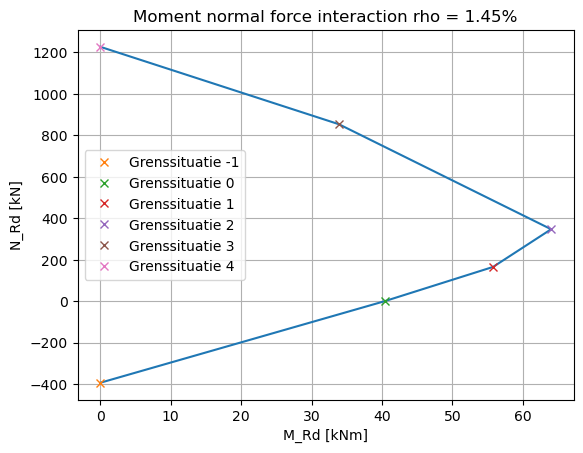

In [337]:
plt.plot(M_Rd, N_Rd)

for i in range(len(M_Rd)):
    plt.plot(M_Rd[i], N_Rd[i], marker='x', linestyle='', label =f'Grenssituatie {i-1}')

plt.title(f'Moment normal force interaction rho = {rho:.2%}')
plt.xlabel('M_Rd [kNm]')
plt.ylabel('N_Rd [kN]')
plt.legend()
plt.grid()

# Show the plot
plt.show();

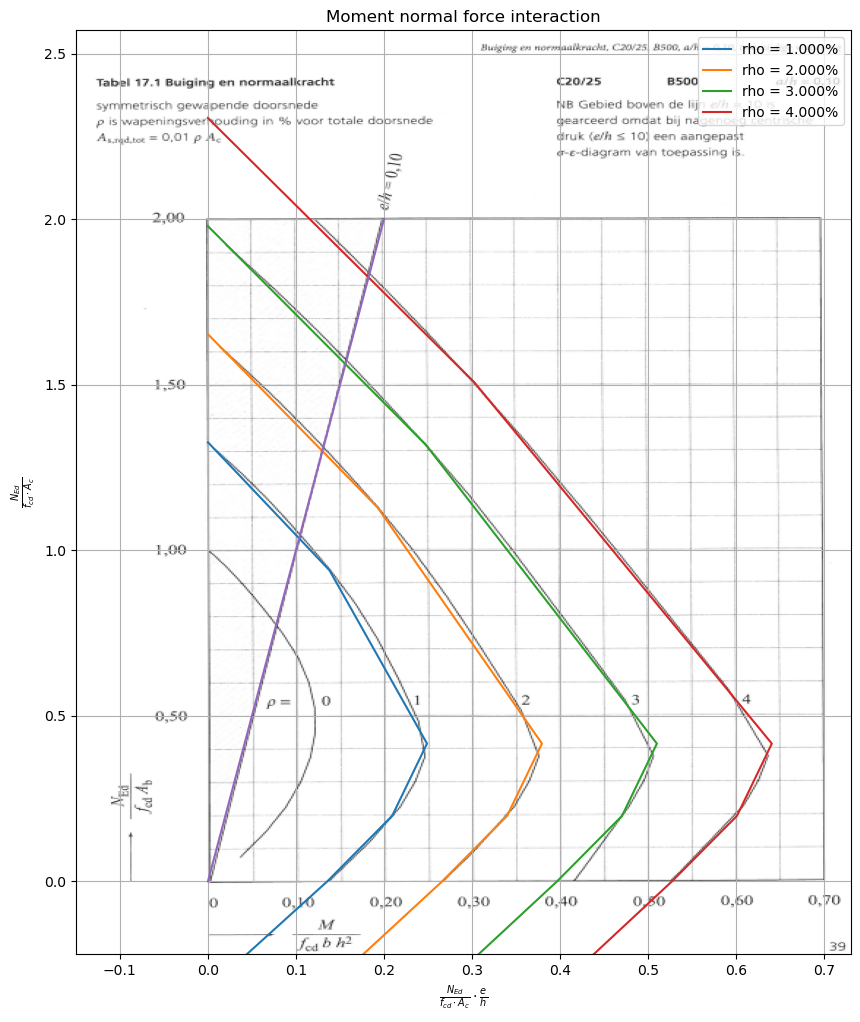

In [308]:
n_hw_list = np.array([n_hw/1.4475, n_hw/1.4475*2, n_hw/1.4475*3, n_hw/1.4475*4])

# Load the background image
table_image = mpimg.imread('Images/GTB_table2008_bilinear.png')

# Create a figure
fig, ax = plt.subplots(figsize=(10, 12))

# Display the background image

y_llim = -0.22
y_ulim = 2.57
ax.imshow(table_image, extent=[-0.15, 0.73, y_llim, y_ulim], aspect='auto')


plt.title('Moment normal force interaction')

for i in range(len(c_list)):
    M_Rd, N_Rd, rho, a_over_h = MN_values(c, phi_bgl, phi_hw, n_hw_list[i], f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)
    x_values = M_Rd*1e6/(f_cd * b*h)*(1/h)
    y_values = N_Rd*1e3/(f_cd * b*h)
    ax.plot(x_values, y_values, label =f'rho = {rho:.3%}')

x_line = np.linspace(0, 0.20, 50)
y_line = 10*x_line
ax.plot(x_line, y_line)

plt.xlabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c} \cdot \frac{e}{h}$')
plt.ylabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c}$')
plt.ylim(y_llim, y_ulim)
plt.legend()
plt.grid()

# Show the plot
plt.show();

```{Note}
In the above diagram, a bi-linear stress strain relation has been used. Note that for the new GTB-table a parabola-rectangle has been assumed, this will actually give rise to sleightly different points.
```

## Example using parabola-rectangle stress strain relations for concrete

According to EC2 stress in the concrete can be calculated using the formula:

$ \sigma_c = f_{cd}[1-(1-\frac{\varepsilon_c}{\varepsilon_c2})^{n}] $ for $0 \leq \varepsilon_c \leq \varepsilon_{c2}$  
$ \sigma_c = f_{cd} $ for $ \varepsilon_{c2} \leq \varepsilon_c \leq \varepsilon_{cu2}$

```{figure} Images/parabolisch_linear_sigma_eps.png

Parabola-rectangle $\sigma$-$\varepsilon$ diagram
```

```{Note}
De grafieken zijn gebaseerd op EC2, 6.1 en 3.1.7(1), hetgeen inhoudt dat er is gerekend met het parabool-rechthoek spanning-rek-diagram.

Er is geen gebruikgemaakt van het sterkte-verhogende effect van omsluiting van het beton door de beugels volgens EC2, 3.1.9(2).

Ingevolge EC2, 6.1(5) moet de gemiddelde stuik worden beperkt, waardoor bij vrijwel centrische druk geen vloei van het staal optreedt, immers $ \varepsilon_{c2} < \varepsilon_{sy}$.

Omdat, gezien EC2, 6.1(4) $\frac{e}{h}$ nooit kleiner mag zijn dan 1/30 is de top van de figuur afgekapt met de horizontale lijn waar de bezwijkcontour de diagonaal $ \frac{e}{h} = \frac{1}{3}$ snijdt.

$ e = \frac{M_{Ed}}{N_{Ed}}$, waarin $M_{Ed}$ de rekenwaarde is van het buigend moment, inclusief het tweede-orde moment.

Voor de grafieken tot en met C45/55 wordt de mechanische wapeningsverhouding $\rho \cdot \frac{f_{yd}}{f_cd}$ afgelezen, waaruit $\rho$ te bepalen is. Voor de grafieken vanaf C55/67 wordt de wapeningsverhouding $\rho$ direct afgelezen.

In de koptekst op de navolgende bladen is 0.10 en 0.15 steeds de $\frac{a}{h}$ waarde.
```

```{figure} Images/Reinforcement_Table3.jpg
---
---
```

0.4720584439481011


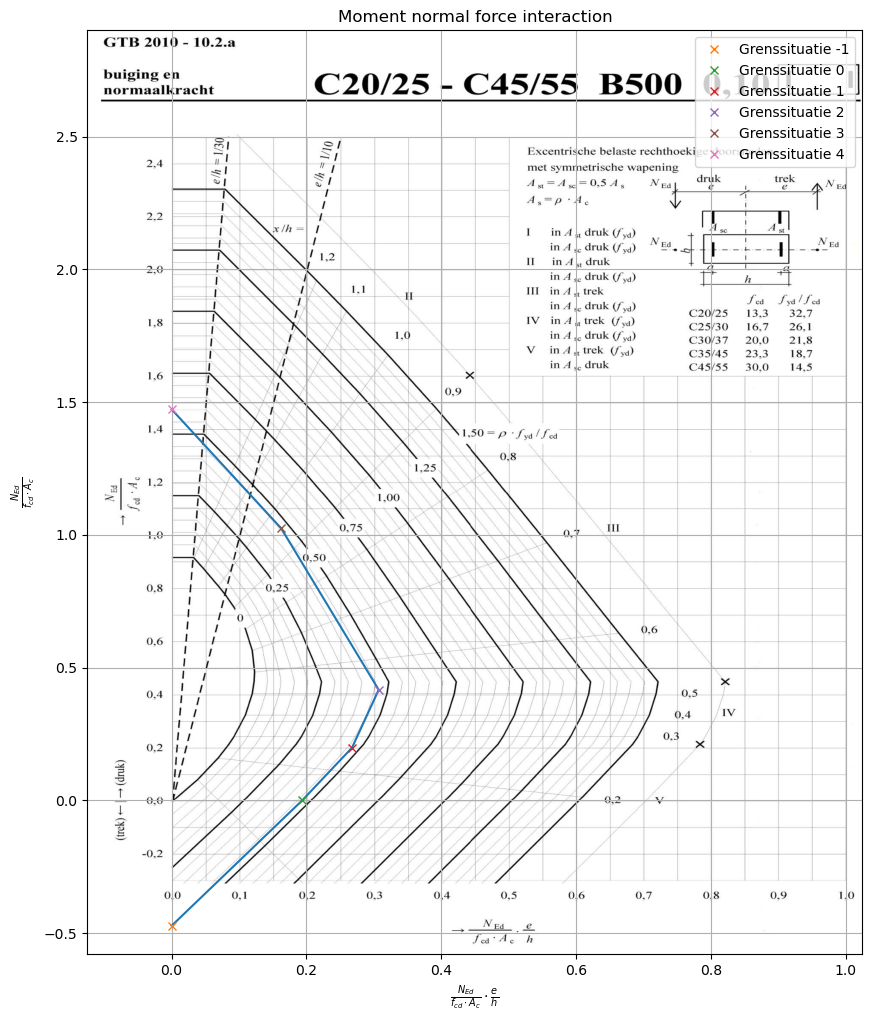

In [327]:
M_Rd, N_Rd, rho, a_over_h = MN_values(c, phi_bgl, phi_hw, n_hw, f_yd, alfa, b, f_cd, h, beta, eps_s, eps_cu3, E_s)
print(rho*f_yd/f_cd)

x_values = M_Rd*1e6/(f_cd * b*h)*(1/h)
y_values = N_Rd*1e3/(f_cd * b*h)

# Load the background image
table_image = mpimg.imread('Images/Reinforcement_Table1.jpg')

# Create a figure
fig, ax = plt.subplots(figsize=(10, 12))

# Display the background image
ax.imshow(table_image, extent=[-0.125, 1.025, -0.58, 2.90], aspect='auto')


plt.title('Moment normal force interaction')
ax.plot(x_values, y_values)

for i in range(len(M_Rd)):
    ax.plot(x_values[i], y_values[i], marker='x', linestyle='', label =f'Grenssituatie {i-1}')

plt.xlabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c} \cdot \frac{e}{h}$')
plt.ylabel(r'$\frac{N_{Ed}}{f_{cd} \cdot A_c}$')
plt.legend()
plt.grid()

# Show the plot
plt.show();